In [19]:
import torch
import model
import config

myNN = model.DBP_NN(channelsIn=160, filtSize=160)
myNN.load_state_dict(torch.load('{}/NN_StateDict_{}.pt'.format(config.savedModelsPath, 249)))

<All keys matched successfully>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

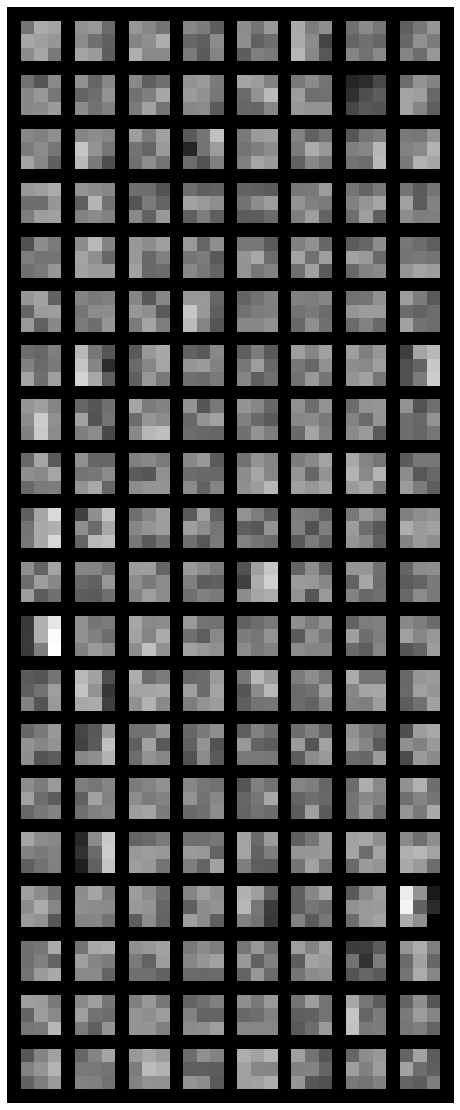

In [21]:
layer = 1
filter = myNN.c1[0].get_parameter('weight')
visTensor(filter, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()